In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5, style='whitegrid')

from upcycle.plotting.credible_regions import get_gaussian_region
from online_gp.utils.plotting import get_arm

In [2]:
# def get_gaussian_region(mean, variance):
#     lb = mean - 2 * np.sqrt(variance)
#     ub = mean + 2 * np.sqrt(variance)
#     return mean, lb, ub

In [3]:
# def get_arm(exp_dir, arm_name, table_name, x_col, y_col, window=1):
#     arm_path = Path(exp_dir) / arm_name
#     arm_dfs = [pd.read_csv(f) for f in arm_path.rglob(f'*{table_name}*')]
#     arm_data = np.stack([df[y_col].rolling(window, min_periods=1).mean() for df in arm_dfs])
#     x_range = arm_dfs[0][x_col].values
#     mean, lb, ub = get_gaussian_region(arm_data.mean(0), arm_data.var(0))
#     return x_range, mean, lb, ub

In [13]:
palette = sns.color_palette('bright')

exp_dir = '../data/experiments/classification/model-dataset-version'
dataset = 'banana'
version = 'v0.0.10'
model_types = ['exact_gpd', 'wiski_gpd','svgp_bin']
model_colors = dict(exact_gpd=palette[7], wiski_gpd=palette[4], svgp_bin=palette[0])
model_labels = dict(exact_gpd='Exact', wiski_gpd='WISKI', svgp_bin='O-SVGP')
window = 4

10 tables found in ../data/experiments/classification/model-dataset-version/exact_gpd-banana-v0.0.10
10 tables found in ../data/experiments/classification/model-dataset-version/exact_gpd-banana-v0.0.10
10 tables found in ../data/experiments/classification/model-dataset-version/wiski_gpd-banana-v0.0.10
10 tables found in ../data/experiments/classification/model-dataset-version/wiski_gpd-banana-v0.0.10
10 tables found in ../data/experiments/classification/model-dataset-version/svgp_bin-banana-v0.0.10
10 tables found in ../data/experiments/classification/model-dataset-version/svgp_bin-banana-v0.0.10


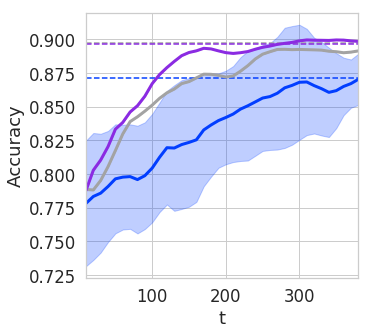

In [15]:
fig = plt.figure(figsize=(5.5, 5))
y_col = 'test_acc'
for m_type in model_types:
    arm_name = f'{m_type}-{dataset}-{version}'
    x_range, mean, lb, ub = get_arm(exp_dir, arm_name, 'online_metrics', 'step', y_col, window)
    _, batch_mean, _, _ = get_arm(exp_dir, arm_name, 'batch_metrics', 'epoch', y_col, window)
    plt.plot(x_range, mean, linewidth=3, label=model_labels[m_type], color=model_colors[m_type])
    plt.fill_between(x_range, lb, ub, alpha=0.25, color=model_colors[m_type])
    xlim = plt.xlim((x_range.values[0], x_range.values[-1]))
    plt.hlines(batch_mean[-1], *xlim, linestyle='--', color=model_colors[m_type])

# plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('t')
# plt.ylim((0.9, 1))
plt.tight_layout()
# plt.title(f'classification - {dataset}')
# plt.savefig(f"figures/classification/{dataset}_accuracy_comparison.pdf")

10 tables found in ../data/experiments/classification/model-dataset-version/exact_gpd-banana-v0.0.10
10 tables found in ../data/experiments/classification/model-dataset-version/wiski_gpd-banana-v0.0.10
10 tables found in ../data/experiments/classification/model-dataset-version/svgp_bin-banana-v0.0.10


Text(0.5, 1.0, 'classification - banana')

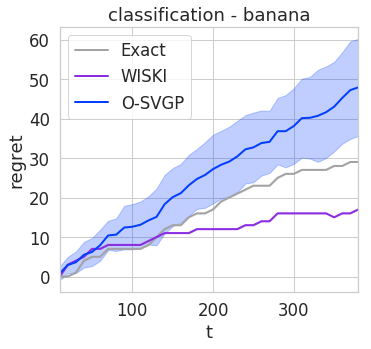

In [10]:
fig = plt.figure(figsize=(5.5, 5))
y_col = 'regret'

for m_type, m_color in zip(model_types, model_colors):
    arm_name = f'{m_type}-{dataset}-{version}'
    x_range, mean, lb, ub = get_arm(exp_dir, arm_name, 'online_metrics', 'step', y_col, window)
    plt.plot(x_range, mean, linewidth=2, label=model_labels[m_type], color=model_colors[m_type])
    plt.fill_between(x_range, lb, ub, alpha=0.25, color=model_colors[m_type])
    xlim = plt.xlim((x_range.values[0], x_range.values[-1]))

plt.legend(loc='upper left')
plt.ylabel(y_col)
plt.xlabel('t')
plt.tight_layout()
plt.title(f'classification - {dataset}')

10 tables found in ../data/experiments/classification/model-dataset-version/exact_gpd-banana-v0.0.10


KeyError: -1

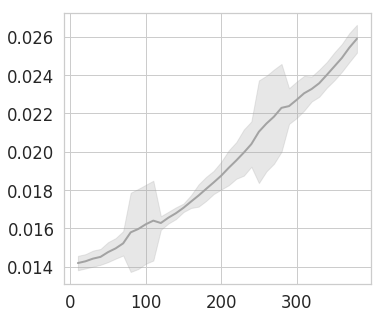

In [7]:
fig = plt.figure(figsize=(5.5, 5))
y_col = 'step_time'

for m_type, m_color in zip(model_types, model_colors):
    arm_name = f'{m_type}-{dataset}-{version}'
    x_range, mean, lb, ub = get_arm(exp_dir, arm_name, 'online_metrics', 'step', y_col, window)
    plt.plot(x_range, mean, linewidth=2, label=model_labels[m_type], color=model_colors[m_type])
    plt.fill_between(x_range, lb, ub, alpha=0.25, color=model_colors[m_type])
    xlim = plt.xlim((x_range[0], x_range[-1]))

plt.legend(loc='upper left')
plt.ylabel(y_col)
plt.xlabel('t')
plt.title(f'classification - {dataset}')